# Analyze Tags of Movies
## Can movies be described by their similarities in a latent space of tag ratings?

### ~13000 movies, and ~1000 tags
### How relevant is each tag to each movie? (0-1)


In [1]:
sc

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1593049829309_0002,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<SparkContext master=yarn appName=livy-session-1>

In [2]:
sc.install_pypi_package('numpy')
sc.install_pypi_package('matplotlib')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…


  Using cached https://files.pythonhosted.org/packages/d9/aa/22af3c636d6b87e8d7f8f28c02da338e348ed08beff1e2b58843f0f62fc1/matplotlib-3.2.2-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/31/b9/6202dcae729998a0ade30e80ac00f616542ef445b088ec970d407dfd41c0/kiwisolver-1.2.0-cp37-cp37m-manylinux1_x86_64.whl

In [3]:
df = sqlContext.read.csv('s3a://sparkdemonstration/movielens-tag-relevance.csv', header=True, inferSchema=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
import random
colsToShow = ['title'] + [random.choice(df.columns) for i in range(4)]
df.select(*colsToShow).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+--------------------+-------------------+--------------------+
|               title|           too short|  intelligent sci-fi|     existentialism|                noir|
+--------------------+--------------------+--------------------+-------------------+--------------------+
|    Toy Story (1995)|             0.14525| 0.05675000000000002|            0.34275|0.060250000000000026|
|      Jumanji (1995)|             0.09925|0.057999999999999996|0.16899999999999998| 0.02174999999999999|
|Grumpier Old Men ...| 0.05449999999999999| 0.04749999999999999|             0.1735|0.018500000000000016|
|Waiting to Exhale...| 0.10399999999999998| 0.03975000000000002|0.16899999999999998|0.023500000000000014|
|Father of the Bri...|             0.58725|0.040750000000000015|0.14900000000000002|0.016500000000000015|
|         Heat (1995)| 0.04375000000000001|0.044999999999999984|            0.45525|              0.2375|
|      Sabrina (1995)| 0.09699999999999998|0.0

In [5]:
df.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

13816

In [6]:
len(df.columns)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1129

In [8]:
from pyspark.ml.feature import VectorAssembler, StandardScaler

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
assembler = VectorAssembler(inputCols=[c for c in df.columns if c != 'title'],
                            outputCol='features')
scaler    = StandardScaler(inputCol='features', outputCol='normFeats', withMean=True)

df          = assembler.transform(df)
scalerModel = scaler.fit(df)
df          = scalerModel.transform(df)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

'Cannot resolve column name "c.s. lewis" among (title, 007, 007 (series), 18th century, 1920s, 1930s, 1950s, 1960s, 1970s, 1980s, 19th century, 3d, 70mm, 80s, 9/11, aardman, aardman studios, abortion, absurd, action, action packed, adaptation, adapted from:book, adapted from:comic, adapted from:game, addiction, adolescence, adoption, adultery, adventure, affectionate, afi 100, afi 100 (laughs), afi 100 (movie quotes), africa, afterlife, aging, aids, airplane, airport, alaska, alcatraz, alcoholism, alien, alien invasion, aliens, allegory, almodovar, alone in the world, alter ego, alternate endings, alternate history, alternate reality, alternate universe, amazing cinematography, amazing photography, american civil war, amnesia, amy smart, android(s)/cyborg(s), androids, animal movie, animals, animated, animation, anime, antarctica, anti-hero, anti-semitism, anti-war, apocalypse, archaeology, argentina, arms dealer, arnold, art, art house, artificial intelligence, artist, artistic, artsy

## Q: What went wrong?

In [10]:
newCols = []

for c in df.columns:
    if "." in c:
        new_column = c.replace('.', '_')
        df = df.withColumnRenamed(c, new_column)
        newCols.append(new_column)
    else:
        newCols.append(c)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [11]:
assembler = VectorAssembler(inputCols=[c for c in newCols if c != 'title'],
                            outputCol='features')
scaler    = StandardScaler(inputCol='features', outputCol='normFeats', withMean=True)

df          = assembler.transform(df)
scalerModel = scaler.fit(df)
df          = scalerModel.transform(df)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## PCA

In [12]:
rdd = df.select('normFeats').rdd

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
from pyspark.mllib.linalg.distributed import RowMatrix
from pyspark.mllib.linalg import Vectors

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
vectors = rdd.map(Vectors.dense)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [15]:
matrix = RowMatrix(vectors)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Get the PCs

In [16]:
pc = matrix.computePrincipalComponents(2)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [17]:
matrix_reduced = matrix.multiply(pc)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [18]:
import numpy as np

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
x_red = np.array(matrix_reduced.rows.collect())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

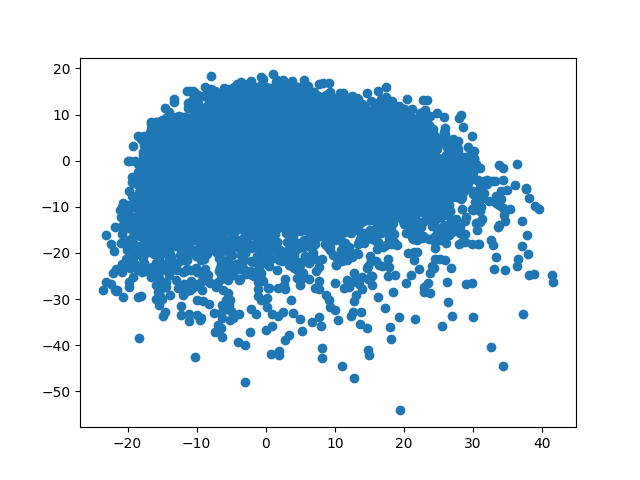

In [21]:
plt.scatter(*x_red.T)
plt.show()
%matplot plt

## Draw loading vectors - but how many?

In [22]:
from pyspark.ml.stat import Summarizer

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [23]:
summarizer = Summarizer.metrics("variance")
variance = df.select(summarizer.summary(df.features))
variance.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------------------+
|aggregate_metrics(features, 1.0)|
+--------------------------------+
|            [[0.0051091225963...|
+--------------------------------+

In [24]:
x = variance.take(1)[0]
variance = x.asDict()['aggregate_metrics(features, 1.0)'].asDict()['variance']
ix = variance.toArray().argsort()
ix = ix[::-1]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [25]:
sortedCols = []
for i in ix[:5]:
    sortedCols.append((i, df.columns[i]))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [26]:
sortedCols

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[(229, 'colourful'), (18, 'absurd'), (845, 'reflective'), (521, 'horrible'), (1019, 'television')]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

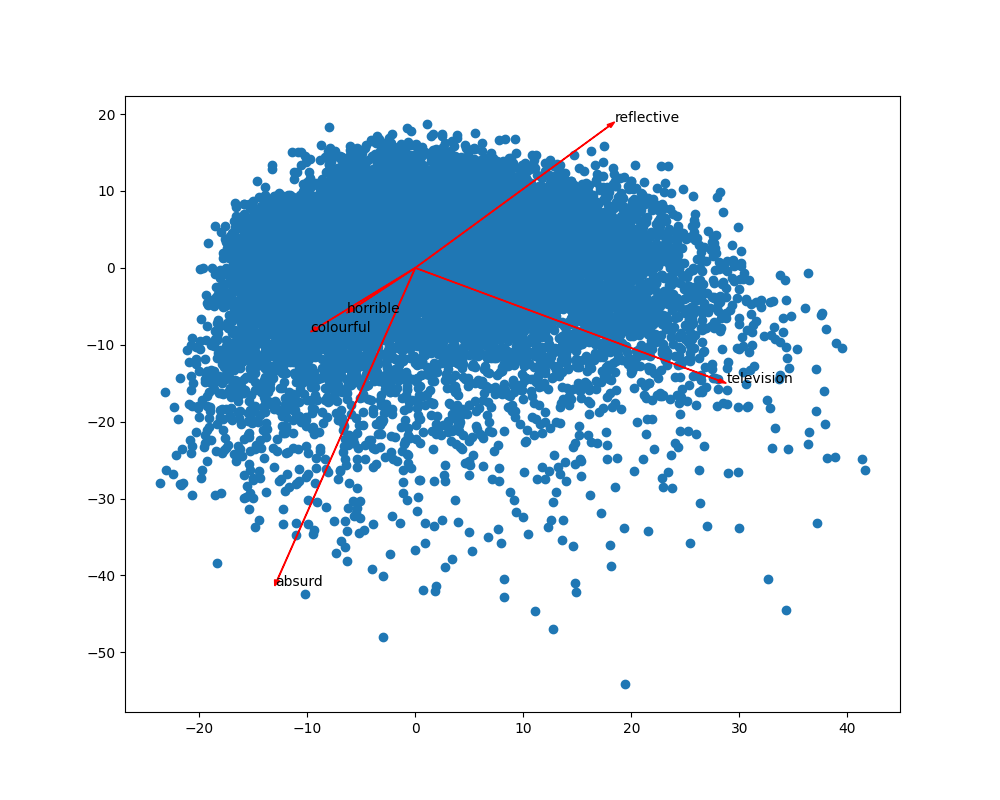

In [27]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(*x_red.T)
pc_matrix = pc.toArray()
for i, tag in sortedCols:
    xx, yy = pc_matrix[i, :] * 500
    ax.arrow(0, 0, xx, yy, color='r', width=0.05, length_includes_head=True, head_width=0.5)
    ax.text(xx, yy, tag)
%matplot plt

## Q: How can the same movies be colourful and horrible? 🤔

In [28]:
x = df.select('colourful').rdd
y = df.select('horrible').rdd

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

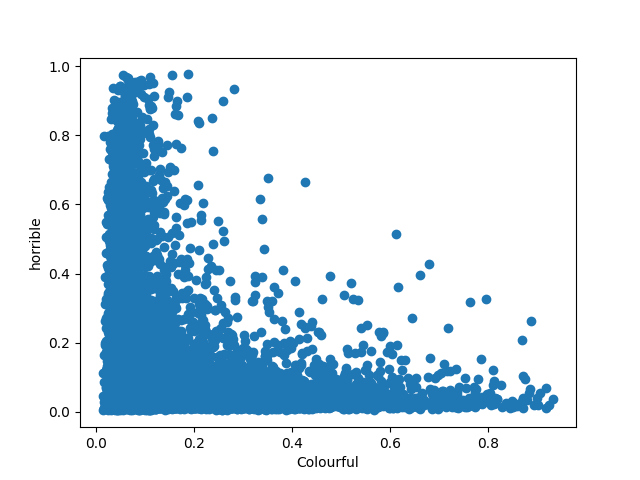

In [29]:
plt.figure()
plt.scatter(np.array(x.collect()), np.array(y.collect()))
plt.xlabel('Colourful')
plt.ylabel('horrible')
%matplot plt

### Finding the explained variance ratio

In [30]:
reduced_rows = matrix_reduced.rows.map(np.array).collect()
reduced_matrix = np.array(reduced_rows)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [31]:
reduced_matrix

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

array([[  5.58054521, -18.61097667],
       [-11.10831191, -13.98894961],
       [ -9.60671636,   1.29851508],
       ...,
       [  3.37264156,  -4.75801367],
       [ 11.39168713, -10.67942055],
       [  1.9800589 ,  -9.38538052]])

In [32]:
reduced_matrix.var(axis=0).sum() / (len(df.columns) - 3) * 100

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

16.085668673930638

### Increase the number of components

In [33]:
pc = matrix.computePrincipalComponents(100)
matrix_reduced = matrix.multiply(pc)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [34]:
reduced_rows = matrix_reduced.rows.map(np.array).collect()
reduced_matrix = np.array(reduced_rows)
reduced_matrix.var(axis=0).sum() / (len(df.columns) - 3) * 100

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

67.71827823640292

In [35]:
pc = matrix.computePrincipalComponents(500)
matrix_reduced = matrix.multiply(pc)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [36]:
reduced_rows = matrix_reduced.rows.map(np.array).collect()
reduced_matrix = np.array(reduced_rows)
reduced_matrix.var(axis=0).sum() / (len(df.columns) - 3) * 100

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

91.0836702294685